# Week 2 - The finite difference method

Generally, the solution for a physical problem is not easy to be achievied.
For most problem an exact analytical soliton is not obtained. But if we could
replace the partial derivative by something else that we could indeed calculate.

The idea of the method is simply replace the derivatives by finite difference
approximations. We then use some points defined around the point that we actually
want to know the derivative.

The finite difference method is considered a *brute force approach*, because
it does not make use of any sofisticated technique/method and uses low-order implementation (what does the latter mean?)

### Definitions

Wave equation

\begin{equation}
\label{eq:wave_equation}    
    \partial_t^2p(x,t) = c^2(x)\nabla^2p(x,t) + s(x,t)
\end{equation}


By the definition of derivative

\begin{equation}
\label{eq:dfdx}    
    \frac{df}{dx} = \lim_{\Delta x \to 0}\frac{f(x+\Delta x) -f(x)}{\Delta x}\,,
\end{equation}
the name "finite difference" stands for the fact that we are not going
to take the limit and we will indeed keep it finite for the numerical calculation.

There are thre kinds of finite difference derivatives

\begin{equation}
\label{eq:dfdx-forward}    
    \frac{df^{(\text{for})}}{dx} \simeq \frac{f(x+\Delta x) -f(x)}{\Delta x}\,,
\end{equation}
\begin{equation}
\label{eq:dfdx-centered}    
    \frac{df^{(\text{cent})}}{dx} \simeq \frac{f(x+\Delta x) -f(x)}{\Delta x}\,,
\end{equation}
\begin{equation}
\label{eq:dfdx-backward}    
    \frac{df^{(\text{back})}}{dx} \simeq \frac{f(x+\Delta x) -f(x)}{\Delta x}\,.
\end{equation}

The remaining question are: *which of them shoul we use and how
to check their accuracy?*

A  way is to make use of a Taylor series, by the example employed,
let's check for the cosine function and its Taylor expansion representation

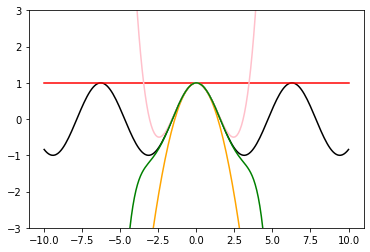

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,200)

plt.ylim(-3,3)
plt.plot(x,np.cos(x), c = 'black')
plt.plot(x,x**0, color = 'red')
plt.plot(x,x**0 - x**2/2, c = 'orange')
plt.plot(x,x**0 - x**2/2 + x**4/24, 'pink')
plt.plot(x,x**0 - x**2/2 + x**4/24 - x**6/720, 'green')

plt.show()

### How to check our approximation for the derivative?

Well, that's done by making a little algebra to obtain by the
Taylor series the following

\begin{align}
    \frac{f(x+\Delta x) - f(x)}{\Delta x} &= f'(x) + \frac{1}{2!}f''(x)\Delta x +
    \frac{1}{3!}f'''(x)(\Delta x)^2\cdots\\
        &\simeq f'(x)\,,
\end{align}

where we are neglecting higher order terms and it is accurate to first order.

### higher order derivatives

For most purposes we would need to calculate the second derivative for the
interesting quantities. To do so, since we already have calculated the firs
order derivative, we have to carry out an order further. With a bit of algebra
we obtain for the second derivative the following

\begin{equation}
\label{eq:2nd-derivative}
    \frac{d^2f}{dx^2}\simeq \frac{f(x + \Delta x)-2f(x) + f(x - \Delta x)}{(\Delta x)^2}
\end{equation}

### 1st derivative

Let's make an example for the first derivative using a Python code.
We will calculate a first order derivative, we will compare it to
the analytical result and also look at the dependence of the error
with respect to the space increment

We will analyse the function

$$ f(x) = \sin(kx)$$

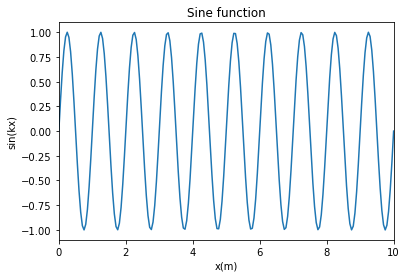

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

#Initial parameters

xmax = 10.0               #max value for the physical domain
xmin = 0.0                #minimun value for the physical domain
nx = 200                #number of grid points
dx = (xmax-xmin)/(nx)   #space between the gridpoints
x = np.linspace(0, xmax, nx)

#Parameters for the sine function

wl = 20*dx              #wavelength that allows us to have 20 points per wavelength
k = 2*pi/wl             #wavenumber
f = np.sin(k*x)

#The plot for the sin function

plt.plot(x,f)
plt.title('Sine function')
plt.xlabel('x(m)')
plt.ylabel('sin(kx)')
plt.xlim(xmin,xmax)
#plt.grid()
plt.show()



The sin function has a very simple derivative, which is already known.
Consequently we can compute the numerical derivative and compare to it.
We will use the centered numerical derivative

$$ \frac{df}{dx} \simeq \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}$$

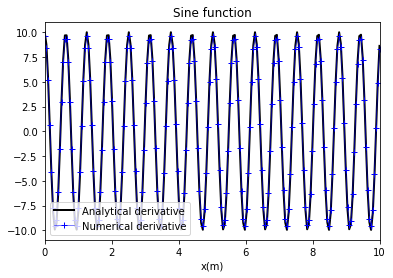

In [104]:
dfdx = (np.sin(k*(x + dx)) - np.sin(k*(x-dx)))/(2*dx)

plt.plot(x,k*np.cos(k*x), c = 'black', lw = 2, ls = '-', label = 'Analytical derivative')
plt.plot(x,dfdx,marker = '+', c = 'blue', lw = 0.5, label = 'Numerical derivative')
plt.title('Sine function')
plt.xlabel('x(m)')
#plt.ylabel('sin(kx)')
plt.xlim(xmin,xmax)
#plt.grid()
plt.legend(loc = 'lower left')
plt.show()

we can also extract the error and introduce into the plot above, for instance

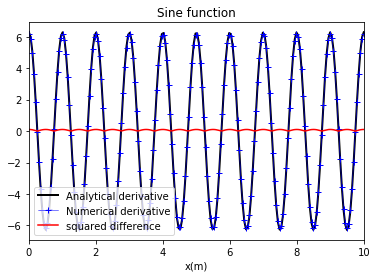

In [61]:
square_diff = (dfdx - k*np.cos(k*x))**2

rms = np.sqrt(np.mean(dfdx - k*np.cos(k*x))**2)
diff = np.sqrt((dfdx - k*np.cos(k*x))**2)

#We can reproduce the plot above with the error within it

plt.plot(x,k*np.cos(k*x), c = 'black', lw = 2, ls = '-', label = 'Analytical derivative')
plt.plot(x,dfdx,marker = '+', c = 'blue', lw = 0.5, label = 'Numerical derivative')
plt.plot(x,diff, c = 'red', label = 'squared difference')

plt.title('Sine function')
plt.xlabel('x(m)')
#plt.ylabel('sin(kx)')
plt.xlim(xmin,xmax)
#plt.grid()
plt.legend(loc = 'lower left')
plt.show()



And as we can see, the error is indeed very small. A question which
naturally arises is how does the error depend on the number of grid points?

The task here is to plot this dependence

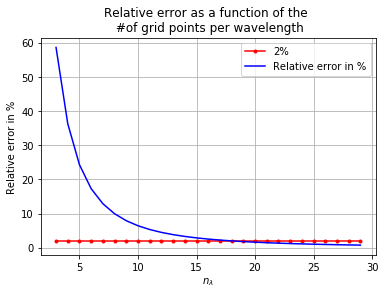

In [102]:
%matplotlib inline

k = 10
wl = 2*np.pi/k

x = np.linspace(0,10,200)

def error(nx):
    dx = wl/nx                                                #our increment
    dfdx_n = (np.sin(k*(x + dx)) - np.sin(k*(x-dx)))/(2*dx)   #numerical derivative
    dfdx_a = k*np.cos(k*x)                                    #analytical derivative
    err =  np.sqrt(np.mean(((dfdx_n - dfdx_a)/dfdx_a)**2))
    return err*100


n = np.arange(3,30)
err_n = np.array([error(i) for i in n])

plt.plot(n,2*n**0, marker = '.', label = '2%', c = 'red')
plt.plot(n,err_n, label = 'Relative error in %', c = 'blue' )

plt.ylabel('Relative error in %')
plt.xlabel('$n_\lambda$')
plt.title('Relative error as a function of the \n #of grid points per wavelength')

plt.grid()
plt.legend()
plt.show()

Although it is already a beginning, that is not sufficient
for more general problems, like time dependent problem

## Operators

An elegant way to derive finite difference operators

By the Taylor series we have

\begin{align}
    f(x+dx) &= f(x) + f'(x)dx + \frac{f''(x)dx^2}{2!}+\cdots\\
    f(x) &= f(x)\\
    f(x-dx) &= f(x) - f'(x)dx + \frac{f''(x)dx^2}{2!}+\cdots\,.
\end{align}

Multiplying the first equation by $A$, the second by $B$ and the
third one by $C$, we have


\begin{align}
    Af(x+dx) &= A\left[f(x) + f'(x)dx + \frac{f''(x)dx^2}{2!}+\cdots\right]\\
    Bf(x)    &= Bf(x)\\
    Cf(x-dx) &= C\left[f(x) - f'(x)dx + \frac{f''(x)dx^2}{2!}+\cdots\right]\,.
\end{align}

If we add them up and group them by order, we have

\begin{align}
        Af(x+dx) + Bf(x) + Cf(x-dx) &\simeq f(x)(A+B+C) + f'(x)dx(A-C) +
        \frac{f''(x)dx^2}{2!}(A+C)\,.
\end{align}

If we assume that $A+B+C = 0$ and that $A+C=0$

*Ah okay, just for putting it into a matrix form*

## Operators for higher orders

So far we got to know how to obtain approximations for the first, second,
and if we need, even higher order derivatives. *Is there a way to obtain
more accurate results than only taking two or three points?*

The answer is *yes* and a way for doing so is to "enlarge" our domain
of influence around the point which are interested in calculating the
derivative.


For example, instead of using three points one could use five points
and perform the Taylor expansion for  $f(x-2dx), f(x-dx) ,f(x), f(x+dx)$
and $f(x+2dx). Since we will have five equations we need to go up to 4th
order in the Taylor expansion to obtain the coefficients and then we solve
a 5x5 matrix problem. More details about the long equations in the video.

## Python: higher order

Now we are going to compare the accuracy of the 3 points second derivative
numerical operator to the 5 points one for the Gaussian given below

$$ f(x) = \frac{1}{\sqrt{2\pi a}}e^{-\frac{(x-x_0)^2}{2a}}$$


The 3points second derivative is given by

$$ f''(x) \simeq \frac{f(x+dx) -2 f(x)  + f(x-dx)}{dx^2}$$

The analytical second derivative for the Gaussian is given by

$$f''(x) = \frac{1}{\sqrt{2\pi a}}\left[\frac{(x-x_0)^2}{a^2}- \frac{1}{a}\right]
            e^{-\frac{(x-x_0)^2}{2a}} $$


We can use the two formulas above to plot them and see the difference,
similar to what we have done


0.008937985375190385


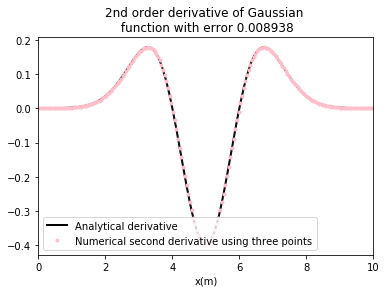

In [140]:
def gaussian(a,x0,x):
    return 1./(np.sqrt(2*np.pi*a))*np.exp(-(x-x0)**2/(2*a))

xmin = 0
xmax = 10
n    = 200

x  = np.linspace(xmin,xmax,n)
dx = (xmin-xmax)/n

x0 = 5
a  = 1


df2_a = ((x-x0)**2/a**2-1./a)*gaussian(1,5,x)

df2_3p = (gaussian(1,5,x+dx) - 2*gaussian(1,5,x) + gaussian(1,5,x-dx))/dx**2


error = np.sqrt(np.mean((df2_a - df2_3p)**2))*100

print (error)

plt.plot(x,df2_a, c = 'black', lw = 2, label = 'Analytical derivative')
plt.plot(x,df2_3p,marker = '.', c = 'pink', lw = 0.1, ls = '--', label = 'Numerical second derivative using three points')
plt.title('2nd order derivative of Gaussian \n function with error %.6f' %error)
plt.xlabel('x(m)')
#plt.ylabel('sin(kx)')
plt.xlim(xmin,xmax)
#plt.grid()
plt.legend(loc = 'lower left')
plt.show()

Now we can do the same for the 5 points second order derivative operator

\begin{equation}
    f''(x) = \frac{-\frac{1}{12}f(x-2dx) + \frac{4}{3}f(x-dx) - \frac{5}{2}f(x) +
        \frac{4}{3}f(x+dx) - \frac{1}{12}f(x+2dx)}{dx^2}
\end{equation}

1.4806034352425523e-05


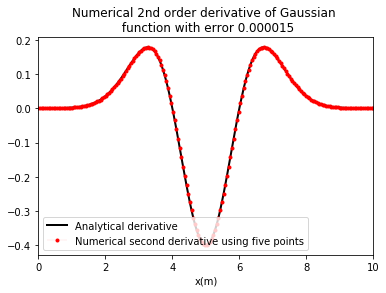

In [151]:
df2_5p = ((-1./12)*gaussian(1,5,x-2*dx) + (4./3)*gaussian(1,5,x-dx)- (5./2)*gaussian(1,5,x) + (4./3)*gaussian(1,5,x+dx)  -(1./12)*gaussian(1,5,x+2*dx))/dx**2


error = np.sqrt(np.mean((df2_a - df2_5p)**2))*100

print (error)

plt.plot(x,df2_a, c = 'black', lw = 2, label = 'Analytical derivative')
plt.plot(x,df2_3p,marker = '.', c = 'red', lw = 0.1, ls = '--', label = 'Numerical second derivative using five points')
plt.title('Numerical 2nd order derivative of Gaussian \n function with error %.6f' %error)
plt.xlabel('x(m)')
#plt.ylabel('sin(kx)')
plt.xlim(xmin,xmax)
#plt.grid()
plt.legend(loc = 'lower left')
plt.show()

## Conclusions: =)



- 3-point finite difference approximations can give a good estimates of the
second derivative contribution.


- We can increase the accuracy of the approximation enlarging the influence domain
for the interesting point that one wants to compute the derivative